Deaths Per Day
            Daily Deaths Addition
Date                             
2021-01-18                 1403.0
2021-01-19                 2769.0
2021-01-20                 4375.0
2021-01-21                 4202.0
2021-01-22                 3758.0


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

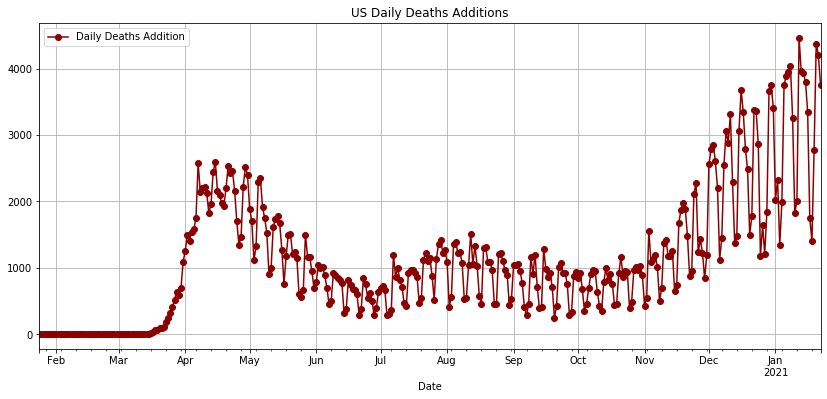

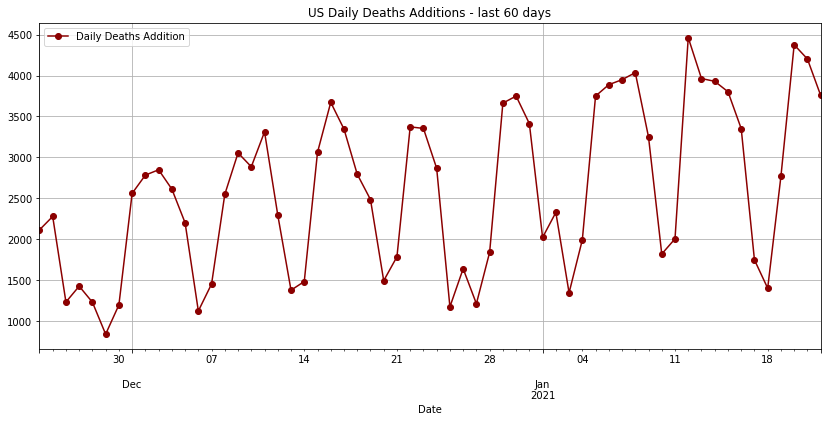

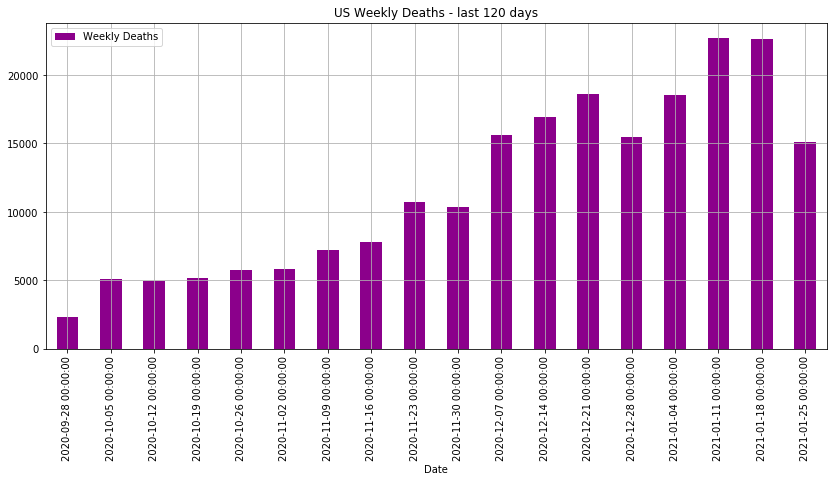

New Cases Per Day
            Daily Cases Addition
Date                            
2021-01-18              141999.0
2021-01-19              177256.0
2021-01-20              182695.0
2021-01-21              193165.0
2021-01-22              189925.0


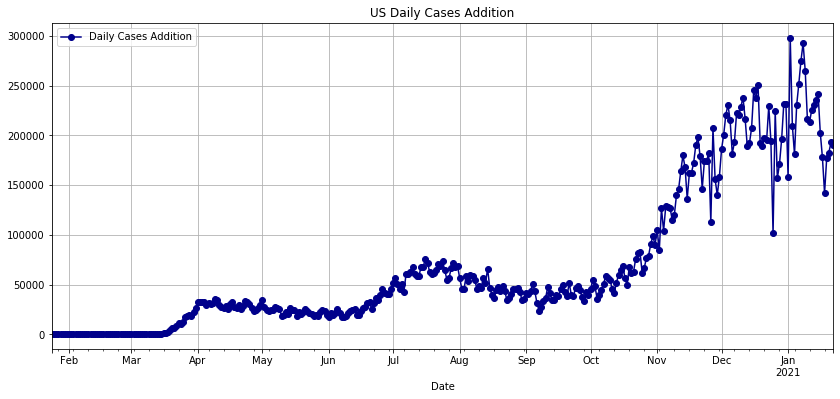

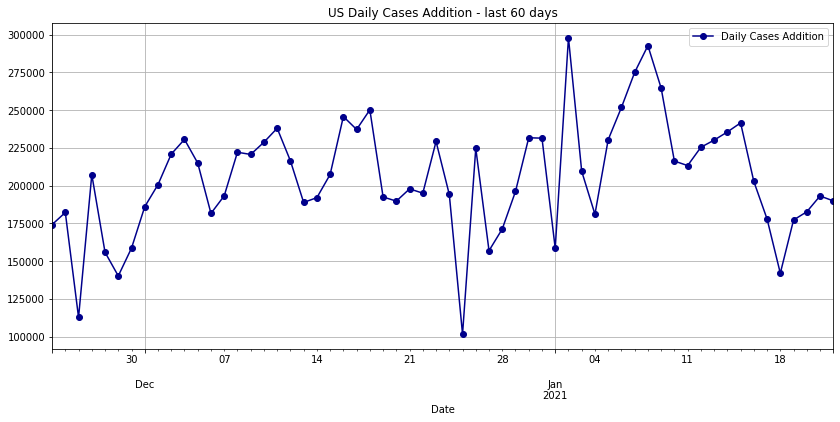

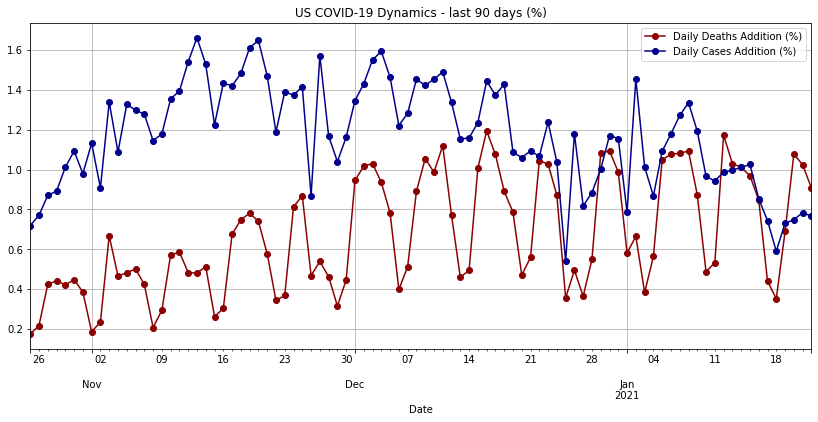

In [1]:
import covid_19_shared
covid_19_shared.Country_COVID19_Stats("US").show()

In [2]:
df = covid_19_shared.get_all_states_stats()

Getting population...
Getting list of states...
Getting USA data...
State                         New Conf. Conf./Popul.(%)     New Death Death/Popul.(%) 
Alabama                       3551      9.123663            107       0.135698        
Alaska                        296       7.448422            0         0.035763        
Arizona                       8099      11.076957           229       0.187750        
Arkansas                      2162      9.649860            53        0.156006        
California                    24393     8.386814            566       0.097606        
Colorado                      1798      7.615690            22        0.108606        
Connecticut                   2019      6.653849            45        0.190789        
Delaware                      710       8.155722            0         0.114374        
District of Columbia          293       5.800842            3         0.144086        
Florida                       13719     8.656860            27

In [3]:
import pandas as pd
df["PopulShare"] =df.Population * 100 / df.Population.sum()

df["Confirmed"] = pd.Series(index=df.index, data=[(v.cv_data_.Confirmed[-1]) for v in df["Statistics"]])
df["OneDayConf"] = pd.Series(index=df.index
                             , data=[v.cv_data_.Confirmed[-1] - v.cv_data_.Confirmed[-2] 
                                     for v in df["Statistics"]])
df["OneWeekConfirmed"] = pd.Series(index=df.index, data=[(v.cv_data_.Confirmed[-1] - v.cv_data_.Confirmed[-8]) for v in df["Statistics"]])

df["ConfShare"] = df.Confirmed * 100 / df.Confirmed.sum()
df["NewConfShare"] = df.OneWeekConfirmed * 100 / df.OneWeekConfirmed.sum()  # using one week stats

df["Deaths"] = pd.Series(index=df.index, data=[(v.cv_data_.Dead[-1]) for v in df["Statistics"]])
df["OneDayDeaths"] = pd.Series(index=df.index, data=[v.cv_data_.Dead[-1] - v.cv_data_.Dead[-2] for v in df["Statistics"]])
df["OneWeekDeaths"] = pd.Series(index=df.index, data=[v.cv_data_.Dead[-1] - v.cv_data_.Dead[-8] for v in df["Statistics"]])

df["DeathsShare"] = df.Deaths * 100 / df.Deaths.sum()
df["NewDeathsShare"] = df.OneWeekDeaths * 100 / df.OneWeekDeaths.sum()
df["LastDayDeathsShare"] = df.OneDayDeaths * 100 / df.OneDayDeaths.sum()

# Indicator of intensity
# "Density" as ratio of value share to population share
df["CasesDensity"] = df.ConfShare / df.PopulShare
df["NewCasesDensity"] = df.NewConfShare / df.PopulShare

df["DeathsDensity"] = df.DeathsShare / df.PopulShare
df["NewDeathsDensity"] = df.NewDeathsShare / df.PopulShare


In [6]:
# df3 = df.copy()
# del df3["Statistics"]
df3 = df[[
          "OneWeekDeaths"
          , "OneDayDeaths"
          
          , "CasesDensity"
          , "NewCasesDensity"
          
          , "DeathsDensity"
          , "NewDeathsDensity"

          , "NewDeathsShare"
          , "LastDayDeathsShare"
         ]]
# dropping statistics column 
# df3 = df3.sort_values("NewDeathsShare", ascending=False)
# df3 = df3.sort_values("NewDeathsDensity", ascending=False)
df3 = df3.sort_values("DeathsDensity", ascending=False)
df3

,OneWeekDeaths,OneDayDeaths,CasesDensity,NewCasesDensity,DeathsDensity,NewDeathsDensity,NewDeathsShare,LastDayDeathsShare
State,,,,,,,,
New Jersey,555,115,0.931633,0.964907,1.792282,0.912991,2.568850,3.060138
New York,1337,187,0.850974,1.229371,1.635051,0.997875,6.188382,4.976051
Massachusetts,478,81,0.945260,1.188840,1.612511,1.055844,2.212451,2.155402
North Dakota,33,6,1.808102,0.354633,1.602653,0.709608,0.152742,0.159659
South Dakota,55,11,1.650682,0.539521,1.561291,0.977008,0.254571,0.292709
Rhode Island,78,7,1.312955,1.241431,1.493832,1.071768,0.361028,0.186269
Mississippi,302,45,1.108438,1.079939,1.453334,1.471980,1.397825,1.197445
Connecticut,225,45,0.837968,0.994346,1.440180,0.910484,1.041426,1.197445
Arizona,961,229,1.395002,1.925854,1.417235,2.174410,4.448044,6.093667
